In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
import cv2
from scipy.stats import stats
import matplotlib.image as mpimg
import math
import os

In [3]:
# We import the data
data = []
folderSave = 'Training_set'
for filename in os.listdir(folderSave):
        img = cv2.imread(os.path.join(folderSave,filename), cv2.IMREAD_GRAYSCALE)
        data.append(img)
data = np.array(data)
data.shape

(1000, 128, 160)

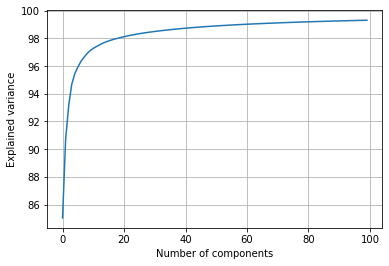

In [5]:
# doing PCA on full dataset instead of one image at a time
# need to use a lot more data for this to be good I think

transformed_data = data.reshape(data.shape[0], data.shape[1]*data.shape[2])

pca = PCA(n_components = 100)
pca.fit(transformed_data)
trans_pca = pca.transform(transformed_data)
img_reduced = pca.inverse_transform(trans_pca)


plt.grid()
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.savefig('Scree plot.png')